Practial 13 : MNIST Handwritten Character Detection using PyTorch, Keras and Tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for Conv2D input: (batch_size, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])

C:\Users\Vaishali Pawar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 26ms/step - accuracy: 0.9074 - loss: 0.3119 - val_accuracy: 0.9839 - val_loss: 0.0520
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9835 - loss: 0.0524 - val_accuracy: 0.9871 - val_loss: 0.0388
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9893 - loss: 0.0345 - val_accuracy: 0.9872 - val_loss: 0.0383
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 27ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9901 - val_loss: 0.0292
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9938 - loss: 0.0183 - val_accuracy: 0.9893 - val_loss: 0.0347


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9875 - loss: 0.0441

Test Accuracy: 0.9893


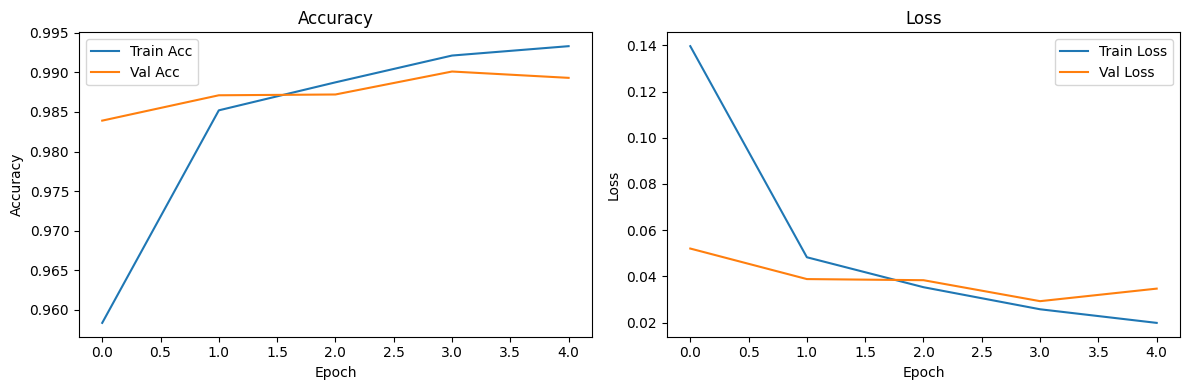

In [8]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plotting
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

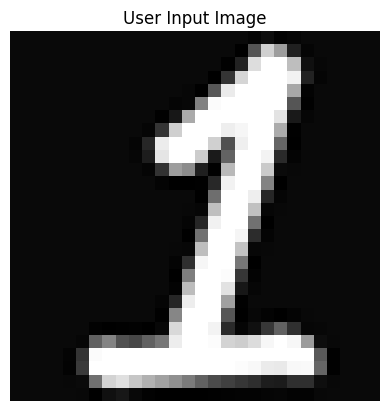

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
Model Prediction: 1


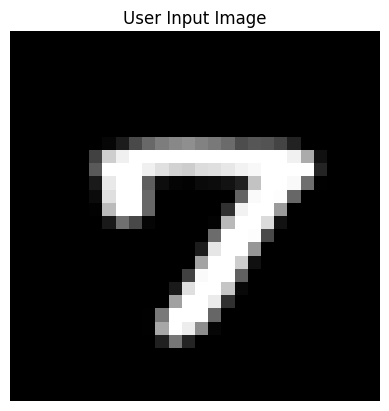

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Model Prediction: 7


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from PIL import Image

for i in range(1, 3):
  # Load user image
  img_path = f'digit_sample{i}.jpg'  # Use your own image file here
  img = Image.open(img_path).convert('L')  # Convert to grayscale

  # Resize to 28x28 pixels (like MNIST)
  img = img.resize((28, 28))

  # Invert the image if background is white and digit is black
  img = np.array(img)
  img = 255 - img

  # Normalize and reshape
  img = img / 255.0
  img_input = img.reshape(1, 28, 28, 1)

  # Display the image
  plt.imshow(img, cmap='gray')
  plt.title("User Input Image")
  plt.axis('off')
  plt.show()

  # Predict using the model
  prediction = model.predict(img_input)
  predicted_class = np.argmax(prediction)

  print(f"Model Prediction: {predicted_class}")